In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression , Ridge, Lasso , RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR,NuSVR,SVR

# Machine Learning Metrics
from sklearn import metrics

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
# Read in data into dataframes 
train_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_features_SiteEnergyUseWN(kBtu).csv')
test_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_features_SiteEnergyUseWN(kBtu).csv')
train_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_labels_SiteEnergyUseWN(kBtu).csv')
test_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_labels_SiteEnergyUseWN(kBtu).csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (4690, 7)
Testing Feature Size:   (2010, 7)
Training Labels Size:   (4690, 1)
Testing Labels Size:    (2010, 1)


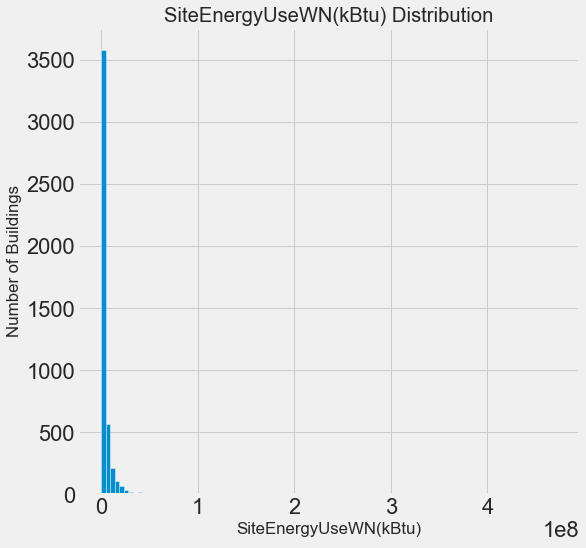

In [3]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['SiteEnergyUseWN(kBtu)'].dropna(), bins = 100);
plt.xlabel('SiteEnergyUseWN(kBtu)'); plt.ylabel('Number of Buildings'); 
plt.title('SiteEnergyUseWN(kBtu) Distribution');

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
X_train=imp.fit_transform(train_features)
X_test = imp.transform(test_features)
X_train

array([[ 1.92000000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         0.00000000e+00,  4.75932200e+01, -1.22324910e+02],
       [ 1.97800000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         4.63300000e+03,  4.76706099e+01, -1.22312744e+02],
       [ 1.90900000e+03,  1.00000000e+00,  3.00000000e+00, ...,
         0.00000000e+00,  4.75976868e+01, -1.22325378e+02],
       ...,
       [ 1.93100000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  4.76303400e+01, -1.22374120e+02],
       [ 2.00500000e+03,  1.00000000e+00,  5.00000000e+00, ...,
         0.00000000e+00,  4.76185600e+01, -1.22321940e+02],
       [ 2.00700000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         0.00000000e+00,  4.76602669e+01, -1.22398534e+02]])

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Transform both training data and testing data
X_train = imputer.fit_transform(train_features)
X_test = imputer.transform(test_features)

In [5]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [6]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [7]:
# Create the scaler object with a range of 0-1
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

# Transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Convert y to one-dimensional array (vector)
y_train = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [9]:
#transforming the X_train and y_train back to a dataframe with imputed values for Hyperparameter Tuner
train_df = train_features.copy()
train_df
#yearbuilt= train_df['YearBuilt']
#latitude= train_df['Latitude']
#longitude= train_df['Longitude']
#train_df.drop(['YearBuilt','Latitude','Longitude'],axis=1)
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(train_df.columns, IterativeImputer(max_iter=10, random_state=0))])
imputed_features = mapper.fit_transform(train_df.copy(), 8)
imputed_features_df = pd.DataFrame(imputed_features, index=train_df.index, columns=train_df.columns)
mapper = DataFrameMapper([(imputed_features_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(imputed_features_df.copy(), 8)
scaled_features_df = pd.DataFrame(scaled_features, index=imputed_features_df.index, columns=imputed_features_df.columns)
scaled_features_df['target']=train_labels
#scaled_features_df['YearBuilt']=yearbuilt
#scaled_features_df['Latitude']=latitude
#scaled_features_df['Longitude']=longitude

scaled_features_df

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,Latitude,Longitude,target
0,-1.455461,-0.040009,-0.134784,-0.364239,-0.280445,-0.641109,0.355726,3.187032e+05
1,0.302971,-0.040009,-0.134784,-0.308225,-0.144122,0.984379,0.803178,9.270320e+05
2,-1.788957,-0.040009,-0.315421,-0.364140,-0.280445,-0.547290,0.338497,1.071527e+06
3,1.151870,-0.040009,-0.496057,-0.298847,0.392400,-0.167346,-0.722148,2.271686e+06
4,0.939645,-0.040009,1.490945,0.623551,-0.280445,-0.139220,-0.693355,1.400268e+07
5,0.242336,-0.040009,-0.315421,-0.287049,-0.280445,1.964631,1.354665,7.169406e+05
6,-1.243237,-0.040009,-0.676694,-0.354216,-0.280445,-1.439046,0.003743,8.720143e+05
7,1.394412,1.586945,0.226489,0.982939,-0.280445,1.193159,0.412367,1.043256e+07
8,-1.849593,-0.040009,0.407126,0.329634,-0.280445,-0.529182,0.095772,4.777761e+06
9,0.879009,-0.040009,-0.134784,-0.306332,-0.074916,0.934031,1.275684,1.623130e+06


In [10]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model, ridgelasso=True):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    model_mse = metrics.mean_squared_error(y_test, model_pred)
    model_rmse = np.sqrt(metrics.mean_squared_error(y_test, model_pred))
    model_r2 = metrics.r2_score(y_test, model_pred)
        
    #Ridge and lasso regressor parameters and GridSearchCV
    if ridgelasso:
        parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10,20]}
        model_regressor = GridSearchCV(model, parameters, scoring = 'neg_mean_squared_error',cv = 5)
        model_regressor_fitted = model_regressor.fit(X_train,y_train)
        model_best_params = model_regressor_fitted.best_params_
        model_best_score = model_regressor_fitted.best_score_
        # Return the performance metrics for Ridge Lasso
        return (model_mae, model_mse, model_rmse, model_r2, model_best_params, model_best_score)
    else :
        # Return the performance metrics for other models
        return (model_mae, model_mse, model_rmse, model_r2)  

In [11]:
lr = LinearRegression()
lr_mae, lr_mse, lr_rmse, lr_r2 = fit_and_evaluate(lr,ridgelasso=False)

print('Linear Regression Performance on the test set: Mean Absolute Error: %.4f' % lr_mae)
print('Linear Regression Performance on the test set: Mean Squared Error: %.4f ' % lr_mse)
print('Linear Regression Performance on the test set: Root Mean Squared Error: %.4f' % lr_rmse)
print('Linear Regression Performance on the test set: R^2: %.4f' % lr_r2)

Linear Regression Performance on the test set: Mean Absolute Error: 3492536.4848
Linear Regression Performance on the test set: Mean Squared Error: 137081522097079.7500 
Linear Regression Performance on the test set: Root Mean Squared Error: 11708181.8442
Linear Regression Performance on the test set: R^2: 0.3244


In [12]:
ridge = Ridge()
ridge_mae, ridge_mse, ridge_rmse, ridge_r2, ridge_best_params, ridge_best_score = fit_and_evaluate(ridge)

print('Ridge Regression Performance on the test set: Mean Absolute Error: %.4f' % ridge_mae)
print('Ridge Regression Performance on the test set: Mean Squared Error: %.4f ' % ridge_mse)
print('Ridge Regression Performance on the test set: Root Mean Squared Error: %.4f' % ridge_rmse)
print('Ridge Regression Performance on the test set: R^2: %.4f' % ridge_r2)
print('Ridge Regression Performance on the test set: Best Parameter: ',ridge_best_params)
print('Ridge Regression Performance on the test set: Best Score: %.4f' %ridge_best_score)

Ridge Regression Performance on the test set: Mean Absolute Error: 3492589.4177
Ridge Regression Performance on the test set: Mean Squared Error: 137089583958756.6562 
Ridge Regression Performance on the test set: Root Mean Squared Error: 11708526.1224
Ridge Regression Performance on the test set: R^2: 0.3244
Ridge Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Ridge Regression Performance on the test set: Best Score: -289026959528260.1875


In [13]:
lasso = Lasso(max_iter=1000000)
lasso_mae, lasso_mse, lasso_rmse, lasso_r2, lasso_best_params, lasso_best_score = fit_and_evaluate(lasso)

print('Lasso Regression Performance on the test set: Mean Absolute Error: %.4f' % lasso_mae)
print('Lasso Regression Performance on the test set: Mean Squared Error: %.4f ' % lasso_mse)
print('Lasso Regression Performance on the test set: Root Mean Squared Error: %.4f' % lasso_rmse)
print('Lasso Regression Performance on the test set: R^2: %.4f' % lasso_r2)
print('Lasso Regression Performance on the test set: Best Parameter: ',lasso_best_params)
print('Lasso Regression Performance on the test set: Best Score: %.4f' %lasso_best_score)

Lasso Regression Performance on the test set: Mean Absolute Error: 3492536.4779
Lasso Regression Performance on the test set: Mean Squared Error: 137081525401563.5156 
Lasso Regression Performance on the test set: Root Mean Squared Error: 11708181.9853
Lasso Regression Performance on the test set: R^2: 0.3244
Lasso Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Lasso Regression Performance on the test set: Best Score: -293164730351178.6875


In [14]:
svm = LinearSVR(C = 2.0,loss='squared_epsilon_insensitive',max_iter=100000)
svm_mae, svm_mse, svm_rmse, svm_r2 = fit_and_evaluate(svm,ridgelasso=False)

print('Support Vector Machine Regression Performance on the test set: Mean Absolute Error %0.4f' % svm_mae)
print('Support Vector Machine Regression Performance on the test set: Mean Squared Error %.4f' % svm_mse)
print('Support Vector Machine Regression Performance on the test set: Root Mean Squared Error %.4f' %  svm_rmse)
print('Support Vector Machine Regression Performance on the test set: R^2 %.4f' % svm_r2)

Support Vector Machine Regression Performance on the test set: Mean Absolute Error 3491815.1483
Support Vector Machine Regression Performance on the test set: Mean Squared Error 137089334552233.8438
Support Vector Machine Regression Performance on the test set: Root Mean Squared Error 11708515.4718
Support Vector Machine Regression Performance on the test set: R^2 0.3244


In [15]:
random_forest = RandomForestRegressor(random_state=60,n_estimators=100)
rf_mae, rf_mse, rf_rmse, rf_r2 = fit_and_evaluate(random_forest,ridgelasso=False)

print('Random Forest Regression Performance on the test set: Mean Absolute Error:  %0.4f' % rf_mae)
print('Random Forest Regression Performance on the test set: Mean Squared Error: %.4f' % rf_mse)
print('Random Forest Regression Performance on the test set: Root Mean Squared Error: %.4f' % rf_rmse)
print('Random Forest Regression Performance on the test set: R^2: %.4f' % rf_r2)

Random Forest Regression Performance on the test set: Mean Absolute Error:  2094148.9088
Random Forest Regression Performance on the test set: Mean Squared Error: 61691169008344.5625
Random Forest Regression Performance on the test set: Root Mean Squared Error: 7854372.6044
Random Forest Regression Performance on the test set: R^2: 0.6960


In [16]:
gradient_boosted = GradientBoostingRegressor(n_estimators=100,max_depth=19,random_state=0,
                                             learning_rate=0.198335,max_features=6,
                                             min_samples_split=15,min_samples_leaf=1)

"""
Best parameters:
- max_depth=19
- learning_rate=0.198335
- max_features=6
- min_samples_split=15
- min_samples_leaf=1
"""

gb_mae , gb_mse, gb_rmse, gb_r2 = fit_and_evaluate(gradient_boosted,ridgelasso=False)

print('Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  %0.4f' % gb_mae)
print('Gradient Boosted Regression Performance on the test set: Mean Squared Error: %.4f ' % gb_mse)
print('Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: %.4f' % gb_rmse)
print('Gradient Boosted Regression Performance on the test set: R^2: %.4f' % gb_r2)

Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  1842342.7186
Gradient Boosted Regression Performance on the test set: Mean Squared Error: 85712328298137.0312 
Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: 9258095.2846
Gradient Boosted Regression Performance on the test set: R^2: 0.5776


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gp = forest_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Best parameters:
- max_depth=19
- learning_rate=0.198335
- max_features=6
- min_samples_split=15
- min_samples_leaf=1


In [17]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae, knn_mse, knn_rmse, knn_r2 = fit_and_evaluate(knn,ridgelasso=False)

print('K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: %0.4f' % knn_mae)
print('K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: %.4f' % knn_mse)
print('K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: %.4f'% knn_rmse)
print('K-Nearest Neighbors Regression Performance on the test set: R^2: %.4f' % knn_r2)

K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: 3028047.8022
K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: 112296606515626.1719
K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: 10597009.3194
K-Nearest Neighbors Regression Performance on the test set: R^2: 0.4466


In [18]:
import xgboost as xgb

    
xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.944300, colsample_bylevel=0.677273,
                           colsample_bynode=0.995943,learning_rate = 0.136523,max_depth = 22, reg_alpha = 4,
                           n_estimators = 100,subsample=0.989844,min_child_weight=3.0,random_state=0,
                           reg_lamba=6)

"""
Best parameters:
- max_depth=22
- learning_rate=0.136523
- min_child_weight=3
- subsample=0.989844
- colsample_bytree=0.944300
- colsample_bylevel=0.677273
- colsample_bynode=0.995943
- reg_alpha=4
- reg_lambda=6
"""
xg_mae, xg_mse, xg_rmse, xg_r2 = fit_and_evaluate(xgboost,ridgelasso=False)
      
print('xgboost Regression Performance on the test set: Mean Absolute Error: %0.4f' % xg_mae)
print('xgboost Regression Performance on the test set: Mean Squared Error: %.4f' % xg_mse)
print('xgboost Regression Performance on the test set: Root Mean Squared Error: %.4f'% xg_rmse)
print('xgboost Regression Performance on the test set: R^2: %.4f' % xg_r2)

xgboost Regression Performance on the test set: Mean Absolute Error: 1798885.8703
xgboost Regression Performance on the test set: Mean Squared Error: 81065562475615.5000
xgboost Regression Performance on the test set: Root Mean Squared Error: 9003641.6230
xgboost Regression Performance on the test set: R^2: 0.6005


In [27]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = xgb.XGBRegressor(n_estimators=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space =[
        Integer(1, 30, name='max_depth'),
        Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
        Integer(1, 10, name='min_child_weight'),
        Real(0.8, 1.0, "log-uniform", name='subsample'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bytree'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bylevel'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bynode'),
        Integer(1, 30, name='reg_alpha'),
        Integer(1, 30, name='reg_lambda')
       ]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gpxgb = forest_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpxgb.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_child_weight=%d
- subsample=%.6f
- colsample_bytree=%.6f
- colsample_bylevel=%.6f
- colsample_bynode=%.6f
- reg_alpha=%d
- reg_lambda=%d
     """ % (res_gpxgb.x[0], res_gpxgb.x[1], 
                            res_gpxgb.x[2], res_gpxgb.x[3], 
                            res_gpxgb.x[4],res_gpxgb.x[5],res_gpxgb.x[6],res_gpxgb.x[7],res_gpxgb.x[8]))

Best parameters:
- max_depth=22
- learning_rate=0.136523
- min_child_weight=3
- subsample=0.989844
- colsample_bytree=0.944300
- colsample_bylevel=0.677273
- colsample_bynode=0.995943
- reg_alpha=4
- reg_lambda=6
     


In [19]:
import lightgbm as lgb

LGBM = lgb.LGBMRegressor(learning_rate=0.330900,
                        n_estimators=500,
                        max_depth=11,
                        num_leaves=30,random_state=0)
"""
Best parameters:
- max_depth=11
- learning_rate=0.330900
- num_leaves=30
"""

lgbm_mae, lgbm_mse, lgbm_rmse, lgbm_r2 = fit_and_evaluate(LGBM,ridgelasso=False)
      
print('lightgbm Regression Performance on the test set: Mean Absolute Error: %0.4f' % lgbm_mae)
print('lightgbm Regression Performance on the test set: Mean Squared Error: %.4f' % lgbm_mse)
print('lightgbm Regression Performance on the test set: Root Mean Squared Error: %.4f'% lgbm_rmse)
print('lightgbm Regression Performance on the test set: R^2: %.4f' % lgbm_r2)

lightgbm Regression Performance on the test set: Mean Absolute Error: 2299903.5296
lightgbm Regression Performance on the test set: Mean Squared Error: 96478744774125.1250
lightgbm Regression Performance on the test set: Root Mean Squared Error: 9822359.4301
lightgbm Regression Performance on the test set: R^2: 0.5245


In [30]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = lgb.LGBMRegressor(n_estimators=500, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='num_leaves')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,forest_minimize
res_gplgbm = forest_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gplgbm.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- num_leaves=%d
""" % (res_gplgbm.x[0],res_gplgbm.x[1], res_gplgbm.x[2]))

Best parameters:
- max_depth=11
- learning_rate=0.330900
- num_leaves=30



In [20]:
from catboost import CatBoostRegressor

CatBoost = CatBoostRegressor(iterations=100,learning_rate=0.171061, depth=5, verbose=True,l2_leaf_reg=11,random_state=0,loss_function='RMSE',score_function='Cosine')

#Best By SKOPT :
#iterations=100,learning_rate=0.353690, depth=8, verbose=True,l2_leaf_reg=2,loss_function='RMSE',score_function='Cosine'

catb_mae, catb_mse, catb_rmse, catb_r2 = fit_and_evaluate(CatBoost,ridgelasso=False)
      
print('CatBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % catb_mae)
print('CatBoost Regression Performance on the test set: Mean Squared Error: %.4f' % catb_mse)
print('CatBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% catb_rmse)
print('CatBoost Regression Performance on the test set: R^2: %.4f' % catb_r2)

0:	learn: 15253518.6199579	total: 99.5ms	remaining: 9.85s
1:	learn: 14509882.3773389	total: 133ms	remaining: 6.5s
2:	learn: 13899208.2811736	total: 163ms	remaining: 5.27s
3:	learn: 13230769.2815079	total: 200ms	remaining: 4.79s
4:	learn: 12774160.5533985	total: 241ms	remaining: 4.58s
5:	learn: 12326094.4251301	total: 276ms	remaining: 4.33s
6:	learn: 12027122.0547132	total: 313ms	remaining: 4.15s
7:	learn: 11739118.5404785	total: 349ms	remaining: 4.01s
8:	learn: 11514185.3342157	total: 387ms	remaining: 3.91s
9:	learn: 11255040.9040020	total: 416ms	remaining: 3.75s
10:	learn: 11122107.7361184	total: 448ms	remaining: 3.62s
11:	learn: 10986387.6004442	total: 480ms	remaining: 3.52s
12:	learn: 10810342.5652301	total: 513ms	remaining: 3.43s
13:	learn: 10651725.2386636	total: 545ms	remaining: 3.35s
14:	learn: 10557570.3535021	total: 580ms	remaining: 3.29s
15:	learn: 10450205.4666191	total: 610ms	remaining: 3.2s
16:	learn: 10278567.8831700	total: 641ms	remaining: 3.13s
17:	learn: 10259519.32108

In [21]:
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = CatBoostRegressor(iterations=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 16, name='depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='l2_leaf_reg')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,forest_minimize
res_gpcat = forest_minimize(objective, space, n_calls=10, random_state=0)

"Best score=%.4f" % res_gpcat.fun

print("""Best parameters:
- depth=%d
- learning_rate=%.6f
- l2_leaf_reg=%d
""" % (res_gpcat.x[0],res_gpcat.x[1], res_gpcat.x[2]))

Best parameters:
- depth=16
- learning_rate=0.224097
- l2_leaf_reg=5



In [22]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(base_estimator=None, learning_rate=0.32752639082712953, loss='square',
         n_estimators=72, random_state=None)


adab_mae, adab_mse, adab_rmse, adab_r2 = fit_and_evaluate(ada_reg,ridgelasso=False)
      
print('AdaBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % adab_mae)
print('AdaBoost Regression Performance on the test set: Mean Squared Error: %.4f' % adab_mse)
print('AdaBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% adab_rmse)
print('AdaBoost Regression Performance on the test set: R^2: %.4f' % adab_r2)

AdaBoost Regression Performance on the test set: Mean Absolute Error: 3816046.6721
AdaBoost Regression Performance on the test set: Mean Squared Error: 108199140826625.8125
AdaBoost Regression Performance on the test set: Root Mean Squared Error: 10401881.6003
AdaBoost Regression Performance on the test set: R^2: 0.4668


In [127]:
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import pandas as pd
from time import time

from sklearn.datasets import load_digits
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Utility function to report best scores+timings
def report_perf(optimizer, X, y, title):
    optimizer.fit(X_train, y_train)
    print(title, "best CV score:", optimizer.best_score_)
    print(title, "best CV parameters:", optimizer.best_params_)

#define partitioning
kf = KFold(n_splits=5,random_state=22)
# build a regressor
reg = AdaBoostRegressor(n_estimators=500,random_state=32)

total_iter = 40

for baseEstimator in ['GP','RF','ET']:
    opt = BayesSearchCV(reg,
        {"n_estimators": (1,500),
                  "learning_rate": Real(1e-6, 1e+1, prior='log-uniform'),
                  "loss": ["exponential", "linear","square"]},
        n_iter=total_iter,n_jobs=-1,cv=kf,return_train_score=False,optimizer_kwargs={'base_estimator': baseEstimator})
    report_perf(opt, X_train, y_train,'BayesSearchCV_'+baseEstimator)

random_search = RandomizedSearchCV(reg, param_distributions={"n_estimators": (1,500),
                  "learning_rate": Real(1e-6, 1e+1, prior='log-uniform'),
                  "loss": ['exponential', "linear","square"]},n_iter=total_iter,n_jobs=-1,cv=kf,
                                   return_train_score=False)
report_perf(random_search, X_train, y_train,'RandomizedSearchCV')

grid_search = GridSearchCV(reg, param_grid={"n_estimators": [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800],
                  "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
                  "loss": ["exponential", "linear","square"]},n_jobs=-1,cv=kf,return_train_score=False)
report_perf(grid_search, X_train, y_train,'GridSearchCV')

BayesSearchCV_GP best CV score: 0.43417101275977854
BayesSearchCV_GP best CV parameters: {'learning_rate': 0.32752639082712953, 'loss': 'square', 'n_estimators': 72}
BayesSearchCV_RF best CV score: 0.3543318367267602
BayesSearchCV_RF best CV parameters: {'learning_rate': 0.3324620755192638, 'loss': 'linear', 'n_estimators': 60}
BayesSearchCV_ET best CV score: 0.41924011216781043
BayesSearchCV_ET best CV parameters: {'learning_rate': 0.07508409455268841, 'loss': 'square', 'n_estimators': 317}
RandomizedSearchCV best CV score: 0.3390213059578479
RandomizedSearchCV best CV parameters: {'learning_rate': array([2.13155262e-06]), 'loss': 'exponential', 'n_estimators': 500}
GridSearchCV best CV score: 0.4916380100059421
GridSearchCV best CV parameters: {'learning_rate': 0.4, 'loss': 'square', 'n_estimators': 50}


Using TensorFlow backend.
W0825 17:25:52.510653 19824 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 17:25:52.555651 19824 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 17:25:52.564653 19824 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0825 17:25:52.741653 19824 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 17:25:53.367

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1024      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 256)              


Epoch 00024: val_loss improved from 4649766.88806 to 4649743.39232, saving model to Weights-024--4649743.39232.hdf5
Epoch 25/500
3752/3752 [==============================] - 0s 94us/step - loss: 5446935.4392 - coeff_determination: -0.2624 - val_loss: 4649698.8614 - val_coeff_determination: -0.3959

Epoch 00025: val_loss improved from 4649743.39232 to 4649698.86141, saving model to Weights-025--4649698.86141.hdf5
Epoch 26/500
3752/3752 [==============================] - 0s 90us/step - loss: 5446906.3870 - coeff_determination: -0.2512 - val_loss: 4649652.0330 - val_coeff_determination: -0.3959

Epoch 00026: val_loss improved from 4649698.86141 to 4649652.03305, saving model to Weights-026--4649652.03305.hdf5
Epoch 27/500
3752/3752 [==============================] - 0s 92us/step - loss: 5446876.5805 - coeff_determination: -0.2642 - val_loss: 4649621.6002 - val_coeff_determination: -0.3959

Epoch 00027: val_loss improved from 4649652.03305 to 4649621.60021, saving model to Weights-027--46

3752/3752 [==============================] - 0s 90us/step - loss: 5443893.4765 - coeff_determination: -0.2647 - val_loss: 4646544.3795 - val_coeff_determination: -0.3953

Epoch 00082: val_loss improved from 4646630.98614 to 4646544.37953, saving model to Weights-082--4646544.37953.hdf5
Epoch 83/500
3752/3752 [==============================] - 0s 97us/step - loss: 5443818.2665 - coeff_determination: -0.2564 - val_loss: 4646461.6290 - val_coeff_determination: -0.3953

Epoch 00083: val_loss improved from 4646544.37953 to 4646461.62900, saving model to Weights-083--4646461.62900.hdf5
Epoch 84/500
3752/3752 [==============================] - 0s 90us/step - loss: 5443742.1151 - coeff_determination: -0.2761 - val_loss: 4646404.7111 - val_coeff_determination: -0.3952

Epoch 00084: val_loss improved from 4646461.62900 to 4646404.71109, saving model to Weights-084--4646404.71109.hdf5
Epoch 85/500
3752/3752 [==============================] - 0s 93us/step - loss: 5443665.5586 - coeff_determination


Epoch 00110: val_loss improved from 4644296.03838 to 4644164.42431, saving model to Weights-110--4644164.42431.hdf5
Epoch 111/500
3752/3752 [==============================] - 0s 97us/step - loss: 5441453.2122 - coeff_determination: -0.2660 - val_loss: 4643988.0682 - val_coeff_determination: -0.3948

Epoch 00111: val_loss improved from 4644164.42431 to 4643988.06823, saving model to Weights-111--4643988.06823.hdf5
Epoch 112/500
3752/3752 [==============================] - 0s 97us/step - loss: 5441359.9238 - coeff_determination: -0.2713 - val_loss: 4643843.7548 - val_coeff_determination: -0.3948

Epoch 00112: val_loss improved from 4643988.06823 to 4643843.75480, saving model to Weights-112--4643843.75480.hdf5
Epoch 113/500
3752/3752 [==============================] - 0s 91us/step - loss: 5441265.9957 - coeff_determination: -0.2611 - val_loss: 4643740.2687 - val_coeff_determination: -0.3947

Epoch 00113: val_loss improved from 4643843.75480 to 4643740.26866, saving model to Weights-113-

3752/3752 [==============================] - 0s 100us/step - loss: 5438626.3102 - coeff_determination: -0.2835 - val_loss: 4641574.0458 - val_coeff_determination: -0.3942

Epoch 00139: val_loss did not improve from 4641207.88806
Epoch 140/500
3752/3752 [==============================] - 0s 95us/step - loss: 5438519.8305 - coeff_determination: -0.2350 - val_loss: 4641025.9030 - val_coeff_determination: -0.3942

Epoch 00140: val_loss improved from 4641207.88806 to 4641025.90299, saving model to Weights-140--4641025.90299.hdf5
Epoch 141/500
3752/3752 [==============================] - 0s 98us/step - loss: 5438403.8870 - coeff_determination: -0.2655 - val_loss: 4640831.8902 - val_coeff_determination: -0.3941

Epoch 00141: val_loss improved from 4641025.90299 to 4640831.89019, saving model to Weights-141--4640831.89019.hdf5
Epoch 142/500
3752/3752 [==============================] - 0s 96us/step - loss: 5438294.0640 - coeff_determination: -0.2741 - val_loss: 4640765.4009 - val_coeff_determin


Epoch 00167: val_loss improved from 4638125.24414 to 4637960.90725, saving model to Weights-167--4637960.90725.hdf5
Epoch 168/500
3752/3752 [==============================] - 0s 99us/step - loss: 5435230.8326 - coeff_determination: -0.2567 - val_loss: 4637853.9072 - val_coeff_determination: -0.3935

Epoch 00168: val_loss improved from 4637960.90725 to 4637853.90725, saving model to Weights-168--4637853.90725.hdf5
Epoch 169/500
3752/3752 [==============================] - 0s 118us/step - loss: 5435106.1279 - coeff_determination: -0.2993 - val_loss: 4637891.8497 - val_coeff_determination: -0.3935

Epoch 00169: val_loss did not improve from 4637853.90725
Epoch 170/500
3752/3752 [==============================] - 0s 118us/step - loss: 5434980.3582 - coeff_determination: -0.2724 - val_loss: 4637700.3401 - val_coeff_determination: -0.3935

Epoch 00170: val_loss improved from 4637853.90725 to 4637700.34009, saving model to Weights-170--4637700.34009.hdf5
Epoch 171/500
3752/3752 [============


Epoch 00225: val_loss improved from 4629461.36567 to 4629259.56503, saving model to Weights-225--4629259.56503.hdf5
Epoch 226/500
3752/3752 [==============================] - 0s 103us/step - loss: 5427121.1866 - coeff_determination: -0.2417 - val_loss: 4630005.1919 - val_coeff_determination: -0.3919

Epoch 00226: val_loss did not improve from 4629259.56503
Epoch 227/500
3752/3752 [==============================] - 0s 110us/step - loss: 5426970.6194 - coeff_determination: -0.2436 - val_loss: 4629286.4584 - val_coeff_determination: -0.3919

Epoch 00227: val_loss did not improve from 4629259.56503
Epoch 228/500
3752/3752 [==============================] - 0s 102us/step - loss: 5426827.6343 - coeff_determination: -0.2329 - val_loss: 4630168.8454 - val_coeff_determination: -0.3920

Epoch 00228: val_loss did not improve from 4629259.56503
Epoch 229/500
3752/3752 [==============================] - 0s 99us/step - loss: 5426670.0810 - coeff_determination: -0.2565 - val_loss: 4629261.1418 - val


Epoch 00285: val_loss did not improve from 4619578.26866
Epoch 286/500
3752/3752 [==============================] - 0s 89us/step - loss: 5416927.1130 - coeff_determination: -0.2389 - val_loss: 4619459.3049 - val_coeff_determination: -0.3900

Epoch 00286: val_loss improved from 4619578.26866 to 4619459.30490, saving model to Weights-286--4619459.30490.hdf5
Epoch 287/500
3752/3752 [==============================] - 0s 87us/step - loss: 5416739.2026 - coeff_determination: -0.2936 - val_loss: 4619140.3646 - val_coeff_determination: -0.3899

Epoch 00287: val_loss improved from 4619459.30490 to 4619140.36461, saving model to Weights-287--4619140.36461.hdf5
Epoch 288/500
3752/3752 [==============================] - 0s 86us/step - loss: 5416566.3177 - coeff_determination: -0.2528 - val_loss: 4618860.9904 - val_coeff_determination: -0.3899

Epoch 00288: val_loss improved from 4619140.36461 to 4618860.99041, saving model to Weights-288--4618860.99041.hdf5
Epoch 289/500
3752/3752 [==============


Epoch 00315: val_loss improved from 4613162.21748 to 4612885.76119, saving model to Weights-315--4612885.76119.hdf5
Epoch 316/500
3752/3752 [==============================] - 0s 87us/step - loss: 5411177.0490 - coeff_determination: -0.2553 - val_loss: 4614355.6354 - val_coeff_determination: -0.3889

Epoch 00316: val_loss did not improve from 4612885.76119
Epoch 317/500
3752/3752 [==============================] - 0s 87us/step - loss: 5410957.0874 - coeff_determination: -0.2539 - val_loss: 4614050.7900 - val_coeff_determination: -0.3889

Epoch 00317: val_loss did not improve from 4612885.76119
Epoch 318/500
3752/3752 [==============================] - 0s 89us/step - loss: 5410758.6098 - coeff_determination: -0.2344 - val_loss: 4613209.3230 - val_coeff_determination: -0.3887

Epoch 00318: val_loss did not improve from 4612885.76119
Epoch 319/500
3752/3752 [==============================] - 0s 91us/step - loss: 5410550.8443 - coeff_determination: -0.2570 - val_loss: 4614649.3806 - val_co

3752/3752 [==============================] - 0s 84us/step - loss: 5404930.5853 - coeff_determination: -0.2462 - val_loss: 4607729.3859 - val_coeff_determination: -0.3876

Epoch 00346: val_loss did not improve from 4607626.78465
Epoch 347/500
3752/3752 [==============================] - 0s 83us/step - loss: 5404710.8060 - coeff_determination: -0.2611 - val_loss: 4607098.4979 - val_coeff_determination: -0.3875

Epoch 00347: val_loss improved from 4607626.78465 to 4607098.49787, saving model to Weights-347--4607098.49787.hdf5
Epoch 348/500
3752/3752 [==============================] - 0s 83us/step - loss: 5404496.8849 - coeff_determination: -0.2654 - val_loss: 4606436.9200 - val_coeff_determination: -0.3874

Epoch 00348: val_loss improved from 4607098.49787 to 4606436.92004, saving model to Weights-348--4606436.92004.hdf5
Epoch 349/500
3752/3752 [==============================] - 0s 83us/step - loss: 5404279.3326 - coeff_determination: -0.2216 - val_loss: 4605961.4179 - val_coeff_determina


Epoch 00405: val_loss did not improve from 4592575.49787
Epoch 406/500
3752/3752 [==============================] - 0s 87us/step - loss: 5391151.0544 - coeff_determination: -0.2631 - val_loss: 4594090.1269 - val_coeff_determination: -0.3849

Epoch 00406: val_loss did not improve from 4592575.49787
Epoch 407/500
3752/3752 [==============================] - 0s 83us/step - loss: 5390910.5256 - coeff_determination: -0.2550 - val_loss: 4593945.5341 - val_coeff_determination: -0.3848

Epoch 00407: val_loss did not improve from 4592575.49787
Epoch 408/500
3752/3752 [==============================] - 0s 84us/step - loss: 5390660.7079 - coeff_determination: -0.2558 - val_loss: 4594335.8401 - val_coeff_determination: -0.3847

Epoch 00408: val_loss did not improve from 4592575.49787
Epoch 409/500
3752/3752 [==============================] - 0s 89us/step - loss: 5390412.3076 - coeff_determination: -0.2627 - val_loss: 4593587.7154 - val_coeff_determination: -0.3846

Epoch 00409: val_loss did not i


Epoch 00467: val_loss did not improve from 4576989.66844
Epoch 468/500
3752/3752 [==============================] - 0s 90us/step - loss: 5375057.7804 - coeff_determination: -0.2498 - val_loss: 4579321.9168 - val_coeff_determination: -0.3822

Epoch 00468: val_loss did not improve from 4576989.66844
Epoch 469/500
3752/3752 [==============================] - 0s 88us/step - loss: 5374776.1855 - coeff_determination: -0.2520 - val_loss: 4577619.2665 - val_coeff_determination: -0.3818

Epoch 00469: val_loss did not improve from 4576989.66844
Epoch 470/500
3752/3752 [==============================] - 0s 89us/step - loss: 5374508.5789 - coeff_determination: -0.2620 - val_loss: 4577243.0949 - val_coeff_determination: -0.3818

Epoch 00470: val_loss did not improve from 4576989.66844
Epoch 471/500
3752/3752 [==============================] - 0s 85us/step - loss: 5374234.2527 - coeff_determination: -0.2387 - val_loss: 4576087.3369 - val_coeff_determination: -0.3815

Epoch 00471: val_loss improved 

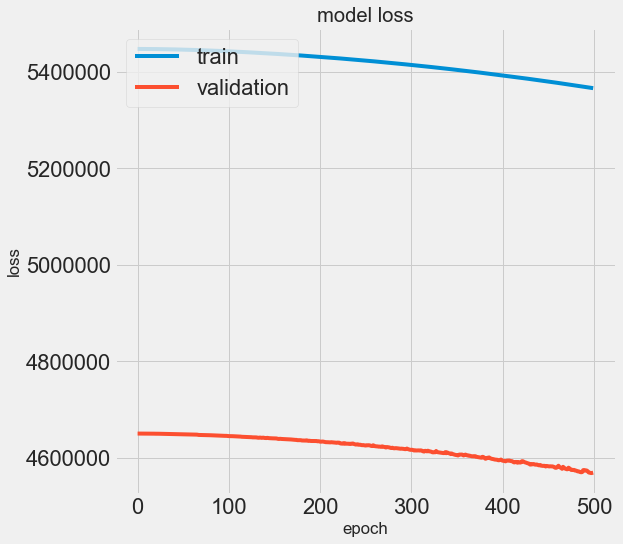

In [22]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#'mse','mae',

model.compile(loss='mae', optimizer='adam', metrics=[coeff_determination])
history = model.fit(X_train, y_train, epochs=500, batch_size=128,  verbose=1, validation_split=0.2,callbacks=callbacks_list)
print(history.history.keys())



# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

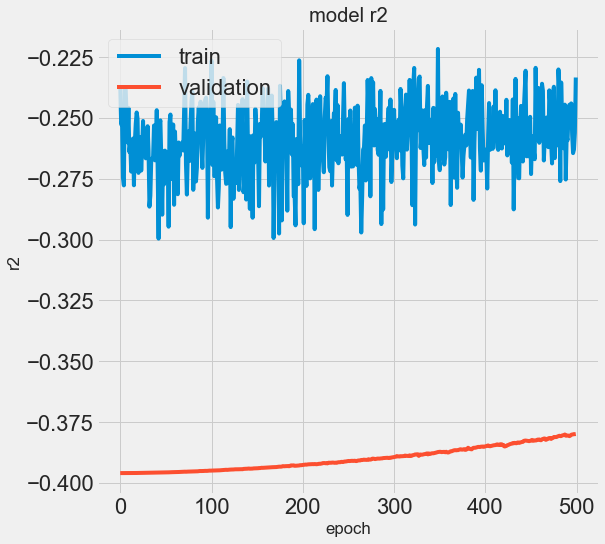

In [23]:
# "R2"
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('model r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

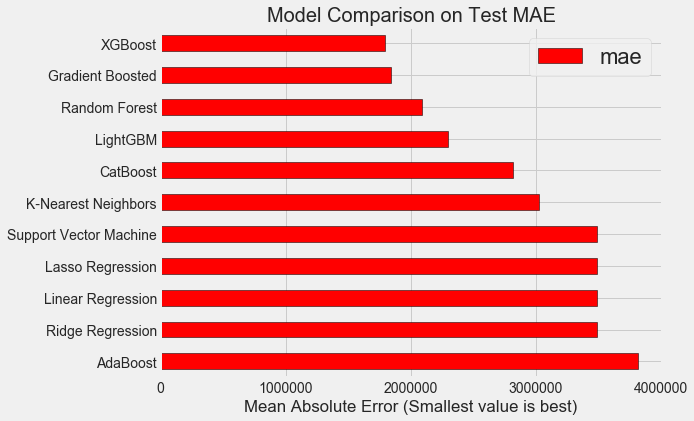

In [23]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mae': [lr_mae,ridge_mae, lasso_mae, svm_mae, rf_mae, 
                                         gb_mae, knn_mae,xg_mae,catb_mae,adab_mae,lgbm_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

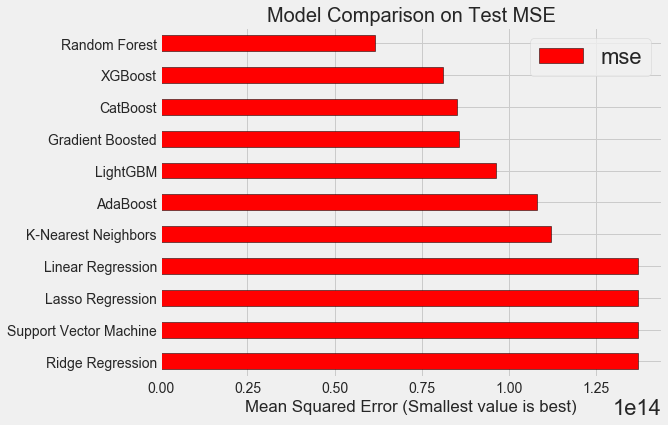

In [24]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mse': [lr_mse, ridge_mse, lasso_mse, svm_mse, rf_mse, 
                                         gb_mse, knn_mse, xg_mse,catb_mse,adab_mse,lgbm_mse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mse', ascending = False).plot(x = 'model', y = 'mse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MSE', size = 20);

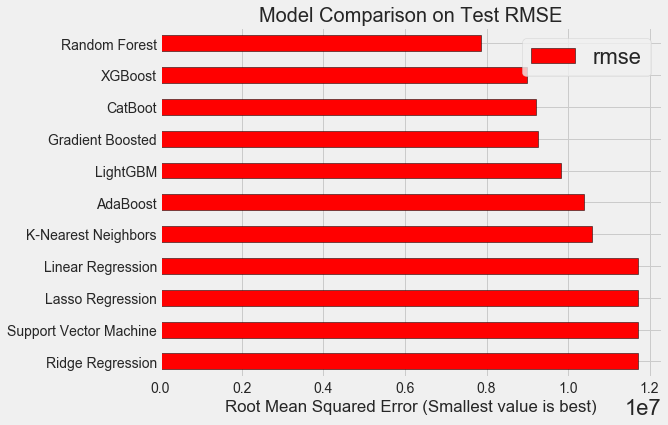

In [25]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoot','AdaBoost','LightGBM'],
                                 'rmse': [lr_rmse,ridge_rmse, lasso_rmse, svm_rmse, rf_rmse, 
                                         gb_rmse, knn_rmse, xg_rmse,catb_rmse,adab_rmse,lgbm_rmse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('rmse', ascending = False).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Root Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test RMSE', size = 20);

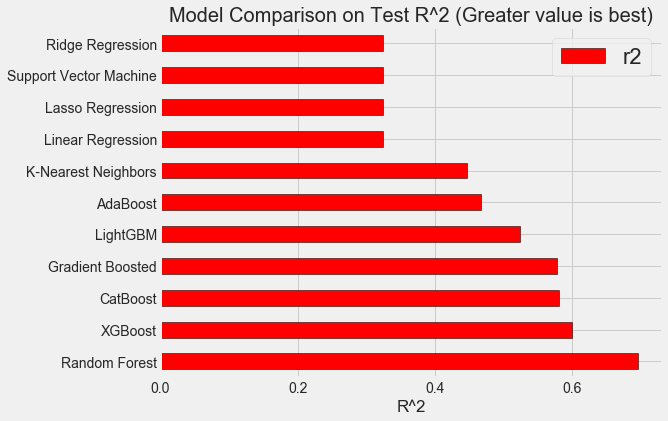

In [26]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'r2': [lr_r2, ridge_r2, lasso_r2, svm_r2, rf_r2, 
                                         gb_r2, knn_r2,xg_r2,catb_r2,adab_r2,lgbm_r2]})

# Horizontal bar chart of test mae
model_comparison.sort_values('r2', ascending = False).plot(x = 'model', y = 'r2', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('R^2'); plt.xticks(size = 14)
plt.title('Model Comparison on Test R^2 (Greater value is best)', size = 20);

In [27]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [28]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [29]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.9min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [30]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
18,77.122749,0.645021,0.109249,0.009908,500,6,1,auto,15,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-1.813022e+06,-2.170310e+06,-2.074484e+06,-1.655710e+06,-1.928409e+06,204647.548366,1,-8.323476e+03,-1.064280e+04,-1.564811e+04,-9.877165e+03,-1.112289e+04,2743.020993
6,182.504748,18.557254,0.363748,0.041937,1500,6,2,sqrt,15,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-1.978568e+06,-2.346399e+06,-2.081158e+06,-1.811698e+06,-2.054502e+06,194066.442459,2,-1.430845e+05,-6.615927e+04,-1.848611e+05,-1.842661e+05,-1.445927e+05,48346.670935
20,39.490997,1.150596,0.114748,0.002950,500,6,1,sqrt,10,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-2.070048e+06,-2.237250e+06,-2.269047e+06,-1.759844e+06,-2.084077e+06,201835.521698,3,-9.111189e+04,-9.069108e+04,-1.036825e+05,-8.335135e+04,-9.220921e+04,7307.653346
2,33.949248,2.735023,0.063249,0.006761,500,4,2,auto,10,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-1.925444e+06,-2.201390e+06,-2.405977e+06,-1.922050e+06,-2.113694e+06,203255.667529,4,-2.349852e+05,-2.060840e+05,-3.803110e+05,-3.511554e+05,-2.931339e+05,74035.967787
8,93.933000,4.460076,0.223247,0.015930,1500,6,2,sqrt,10,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-1.981084e+06,-2.270587e+06,-2.171939e+06,-2.046485e+06,-2.117527e+06,111877.474866,5,-1.963114e+05,-1.419502e+05,-2.961190e+05,-2.376892e+05,-2.180174e+05,56445.123157
11,59.589000,2.459134,0.206996,0.026499,1500,2,4,log2,10,lad,"{'n_estimators': 1500, 'min_samples_split': 2,...",-1.996260e+06,-2.308163e+06,-2.359917e+06,-2.072764e+06,-2.184262e+06,153285.761960,6,-8.789922e+05,-7.398694e+05,-8.147959e+05,-7.613260e+05,-7.987459e+05,53767.470162
4,69.771499,2.121540,0.188997,0.014142,900,6,6,sqrt,15,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-1.974647e+06,-2.337355e+06,-2.416467e+06,-2.037930e+06,-2.191585e+06,188739.484389,7,-8.369463e+05,-7.575151e+05,-8.227676e+05,-7.285324e+05,-7.864404e+05,44890.204283
10,39.465747,0.588187,0.134502,0.030811,1100,10,6,None,10,huber,"{'n_estimators': 1100, 'min_samples_split': 10...",-1.958435e+06,-2.345802e+06,-2.415924e+06,-2.062903e+06,-2.195747e+06,190370.948585,8,-7.477582e+05,-6.563931e+05,-7.331137e+05,-7.045172e+05,-7.104455e+05,34867.218300
1,4.300498,0.247248,0.009998,0.000708,100,6,8,sqrt,10,huber,"{'n_estimators': 100, 'min_samples_split': 6, ...",-2.108868e+06,-2.497959e+06,-2.666376e+06,-2.141062e+06,-2.353545e+06,236488.933655,9,-1.659938e+06,-1.442880e+06,-1.484581e+06,-1.611551e+06,-1.549737e+06,88922.821059
21,9.764998,0.609723,0.035248,0.014378,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-2.123894e+06,-2.476663e+06,-2.598852e+06,-2.279974e+06,-2.369816e+06,181953.109525,10,-1.423611e+06,-1.283710e+06,-1.335092e+06,-1.322044e+06,-1.341114e+06,51236.934275


In [31]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 15,
                                  min_samples_leaf = 1,
                                  min_samples_split = 6,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [33]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 18.8min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=15,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
          

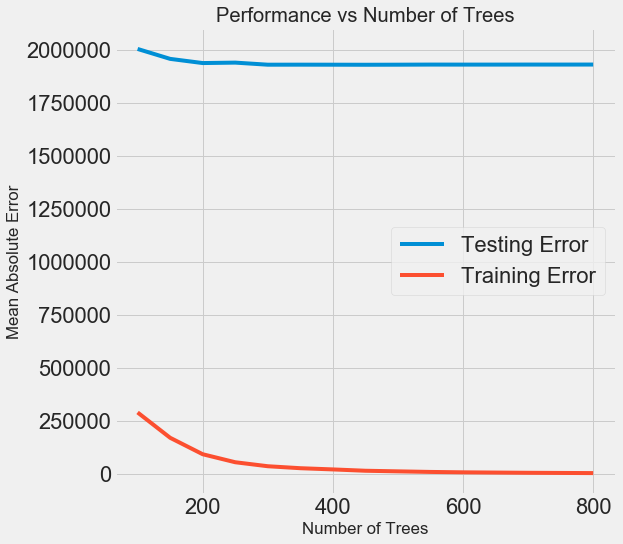

In [34]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Absolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [35]:
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
7,90.228773,0.387797,0.105999,0.007906,450,{'n_estimators': 450},-1.813641e+06,-2.167562e+06,-2.075282e+06,-1.655616e+06,-1.928052e+06,203925.536411,1,-10251.654742,-15657.902005,-18168.985781,-11744.936025,-13955.869638,3132.758260
6,79.617748,0.369229,0.136248,0.020462,400,{'n_estimators': 400},-1.813770e+06,-2.163553e+06,-2.080271e+06,-1.655679e+06,-1.928344e+06,203633.238634,2,-17259.183374,-25322.308160,-23784.391834,-14616.034756,-20245.479531,4441.472234
4,66.338497,0.504151,0.083498,0.014875,300,{'n_estimators': 300},-1.812484e+06,-2.165916e+06,-2.079698e+06,-1.655276e+06,-1.928370e+06,204527.572594,3,-34431.408822,-40526.134376,-39744.059734,-26366.183814,-35266.946686,5648.568394
8,85.047250,0.620490,0.111249,0.008198,500,{'n_estimators': 500},-1.813022e+06,-2.170310e+06,-2.074484e+06,-1.655710e+06,-1.928409e+06,204647.548366,4,-8323.475615,-10642.800079,-15648.110233,-9877.164796,-11122.887681,2743.020993
5,66.092997,0.390400,0.098250,0.016270,350,{'n_estimators': 350},-1.810905e+06,-2.163454e+06,-2.083264e+06,-1.656348e+06,-1.928518e+06,204351.854291,5,-25316.337814,-29469.335974,-29562.828919,-19488.128678,-25959.157846,4110.815971
10,106.380000,1.117928,0.154247,0.020117,600,{'n_estimators': 600},-1.813256e+06,-2.173179e+06,-2.072788e+06,-1.655864e+06,-1.928799e+06,205114.996274,6,-5871.887975,-5591.020050,-8271.622594,-6445.493142,-6545.005940,1043.346148
11,102.245001,0.872366,0.150248,0.014690,650,{'n_estimators': 650},-1.813105e+06,-2.173643e+06,-2.072526e+06,-1.655955e+06,-1.928834e+06,205198.410067,7,-4439.637776,-4562.130188,-6746.916475,-5863.942609,-5403.156762,955.733788
9,86.900997,0.982314,0.127250,0.016452,550,{'n_estimators': 550},-1.812862e+06,-2.173171e+06,-2.073496e+06,-1.656067e+06,-1.928926e+06,205224.993568,8,-7292.063072,-7584.429720,-10585.169796,-8043.532317,-8376.298726,1303.118219
13,90.970047,0.772282,0.134751,0.015006,750,{'n_estimators': 750},-1.812697e+06,-2.174097e+06,-2.071950e+06,-1.656922e+06,-1.928944e+06,204970.314087,9,-3071.306830,-3154.577736,-4632.968676,-3605.815410,-3616.167163,621.274910
12,97.471499,0.492347,0.139498,0.005722,700,{'n_estimators': 700},-1.813138e+06,-2.173809e+06,-2.072145e+06,-1.656796e+06,-1.928999e+06,204897.305466,10,-3716.254835,-3850.028467,-5489.400486,-4270.562746,-4331.561633,699.068723


In [36]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=450,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

314 ms ± 65.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [38]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

48.5 s ± 890 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [39]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 2757825.0127.
Final model performance on the test set:   MAE = 1875765.2910.


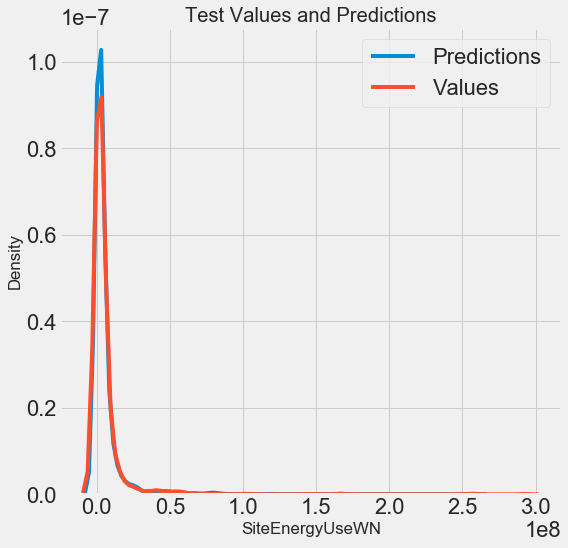

In [40]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('SiteEnergyUseWN'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

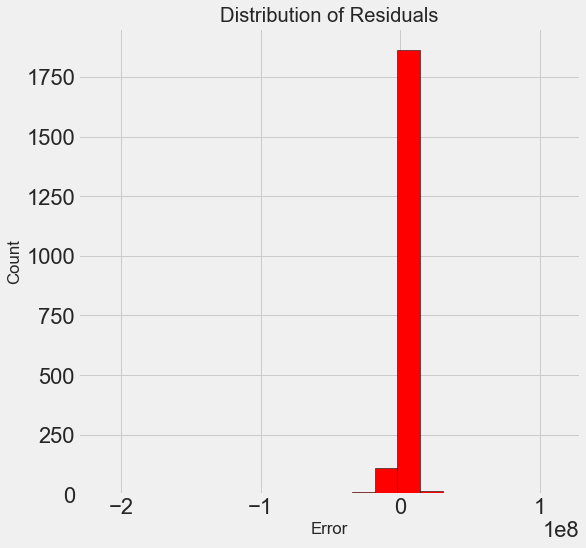

In [41]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');